# **Task 2: Training from scratch: pointclouds**

In [25]:
# necessary imports
import os
import glob
import numpy
import pandas
import random
import trimesh
import logging
import tensorflow
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Lambda, Conv2D, MaxPooling2D
from tensorflow.keras import models, layers, regularizers, optimizers, Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Input

# import Stratified K-Fold Cross Validation notebook
%run KFold-Cross-Validation.ipynb

# dataset root path
DATASET_ROOT = '/run/media/rr/M2/DevOps/jupyter-lab/CIDL/dataset/'

# final preprocessed dataset directory path
DATASET_PATH = os.path.join(DATASET_ROOT, 'Preprocessed')

# number of classes for the classification task
NUM_CLASSES = 5

In [2]:
# only log critical messages
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

## Input Target Size

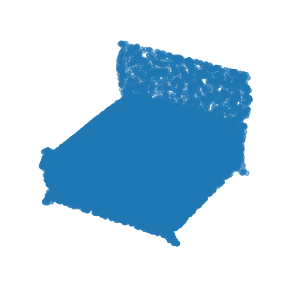

In [3]:
example_path = os.path.join(DATASET_PATH, 'Bed/pointclouds', '1a8e293609eca3b3f7e27638e63d848.obj')
example_obj_file = glob.glob(example_path)
example_mesh = trimesh.load(example_obj_file[0], force='mesh')
points = example_mesh.sample(16384)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.set_axis_off()
#plt.savefig('imgs/example-mesh-resolution-16384.jpg', dpi=200)
plt.show()

In [4]:
# target size
TARGET_SIZE = 16384

## Experiment 0 - Naive Model

Found 20 validated pointcloud filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 3259 validated pointcloud filenames belonging to 5 classes.
Found 652 validated pointcloud filenames belonging to 5 classes.
Model: "Experiment-0-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                   

2022-02-08 19:28:22.191012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 19:28:22.209697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 19:28:22.209817: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 19:28:22.210301: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/200


2022-02-08 19:28:23.389580: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


  1/102 [..............................] - ETA: 2:44 - loss: 2005.6373 - sparse_categorical_accuracy: 0.2188

2022-02-08 19:28:24.077116: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


 94/102 [==========================>...] - ETA: 0s - loss: 420.2351 - sparse_categorical_accuracy: 0.2098
Epoch 00001: val_loss improved from inf to 1.62725, saving model to saved_models/pointclouds/Experiment-0/Experiment-0-fold-1.h5
102/102 [==============================] - 2s 8ms/step - loss: 387.3514 - sparse_categorical_accuracy: 0.2090 - val_loss: 1.6272 - val_sparse_categorical_accuracy: 0.1994
Epoch 2/200
102/102 [==============================] - ETA: 0s - loss: 1.6099 - sparse_categorical_accuracy: 0.2001
Epoch 00002: val_loss improved from 1.62725 to 1.60951, saving model to saved_models/pointclouds/Experiment-0/Experiment-0-fold-1.h5
102/102 [==============================] - 1s 6ms/step - loss: 1.6099 - sparse_categorical_accuracy: 0.2001 - val_loss: 1.6095 - val_sparse_categorical_accuracy: 0.1994
Epoch 3/200
102/102 [==============================] - ETA: 0s - loss: 1.6096 - sparse_categorical_accuracy: 0.2001
Epoch 00003: val_loss improved from 1.60951 to 1.60948, savi

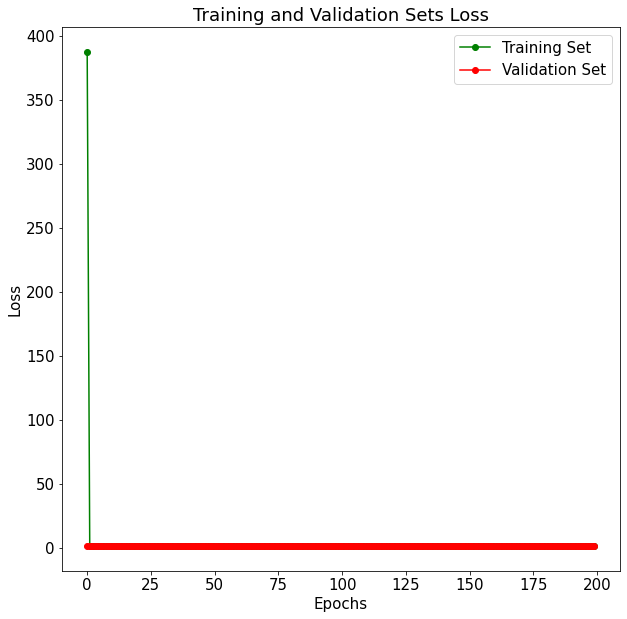

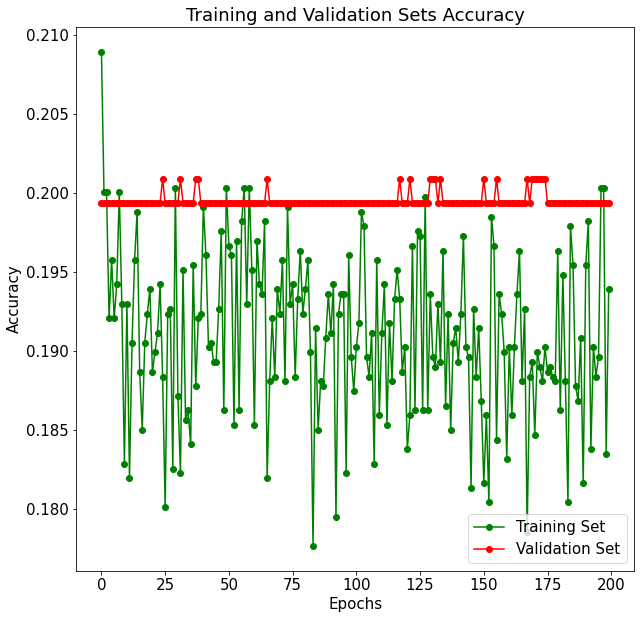

1/1 [==============================] - 0s 43ms/step - loss: 1.6094 - sparse_categorical_accuracy: 0.2000
Best model Test Loss: 1.6094391345977783
Best model Test Accuracy: 0.20000000298023224
Confusion Matrix
Normalized confusion matrix


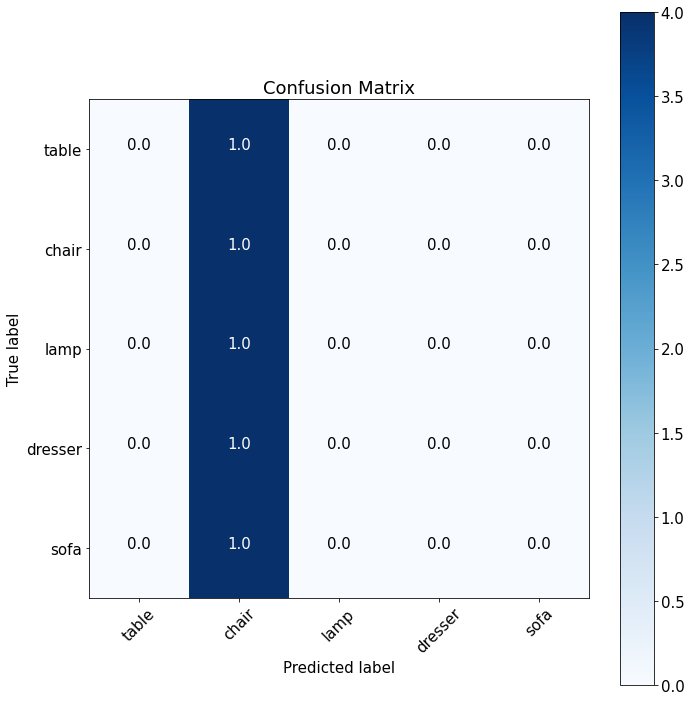

Classification Report
              precision    recall  f1-score   support

       table       0.00      0.00      0.00         4
       chair       0.20      1.00      0.33         4
        lamp       0.00      0.00      0.00         4
     dresser       0.00      0.00      0.00         4
        sofa       0.00      0.00      0.00         4

    accuracy                           0.20        20
   macro avg       0.04      0.20      0.07        20
weighted avg       0.04      0.20      0.07        20


-------- TERMINATED FOLD: 1 --------


/run/media/rr/M2/DevOps/jupyter-lab/python39_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/run/media/rr/M2/DevOps/jupyter-lab/python39_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/run/media/rr/M2/DevOps/jupyter-lab/python39_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [5]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
pointclouds_kfold_validation_conv2d(model_name="Experiment-0", n_splits=6, test_size=0.005,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=200,
                        batch_size=32, one_fold=True, resample_data=0, augment=False)

## Experiment 1 - Model

Found 197 validated pointcloud filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------


2022-02-08 19:33:01.322719: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1223294976 exceeds 10% of free system memory.
2022-02-08 19:33:01.729063: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1223294976 exceeds 10% of free system memory.


Found 3111 validated pointcloud filenames belonging to 5 classes.
Found 623 validated pointcloud filenames belonging to 5 classes.
Model: "Experiment-1-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16384, 32)         128       
                                                                 
 conv1d_1 (Conv1D)           (None, 16384, 64)         2112      
                                                                 
 conv1d_2 (Conv1D)           (None, 16384, 128)        8320      
                                                                 
 flatten (Flatten)           (None, 2097152)           0         
                                                                 
 dense (Dense)               (None, 32)                67108896  
                                                                 
 dense_1 (Dense)             (None, 5)               

2022-02-08 19:33:29.328696: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1223294976 exceeds 10% of free system memory.
2022-02-08 19:33:29.641012: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1223294976 exceeds 10% of free system memory.


Epoch 1/100
98/98 [==============================] - ETA: 0s - loss: 17686.1191 - sparse_categorical_accuracy: 0.2697
Epoch 00001: val_loss improved from inf to 6576.62891, saving model to saved_models/pointclouds/Experiment-1/Experiment-1-fold-1.h5
98/98 [==============================] - 4s 40ms/step - loss: 17686.1191 - sparse_categorical_accuracy: 0.2697 - val_loss: 6576.6289 - val_sparse_categorical_accuracy: 0.2809


2022-02-08 19:33:34.237492: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1223294976 exceeds 10% of free system memory.


Epoch 2/100
97/98 [============================>.] - ETA: 0s - loss: 3176.8357 - sparse_categorical_accuracy: 0.2500
Epoch 00002: val_loss improved from 6576.62891 to 6.57782, saving model to saved_models/pointclouds/Experiment-1/Experiment-1-fold-1.h5
98/98 [==============================] - 4s 39ms/step - loss: 3169.6912 - sparse_categorical_accuracy: 0.2498 - val_loss: 6.5778 - val_sparse_categorical_accuracy: 0.2006
Epoch 3/100
97/98 [============================>.] - ETA: 0s - loss: 43.1049 - sparse_categorical_accuracy: 0.2068
Epoch 00003: val_loss improved from 6.57782 to 1.95455, saving model to saved_models/pointclouds/Experiment-1/Experiment-1-fold-1.h5
98/98 [==============================] - 4s 39ms/step - loss: 43.0116 - sparse_categorical_accuracy: 0.2070 - val_loss: 1.9546 - val_sparse_categorical_accuracy: 0.1990
Epoch 4/100
97/98 [============================>.] - ETA: 0s - loss: 3.5388 - sparse_categorical_accuracy: 0.2065
Epoch 00004: val_loss improved from 1.95455 t

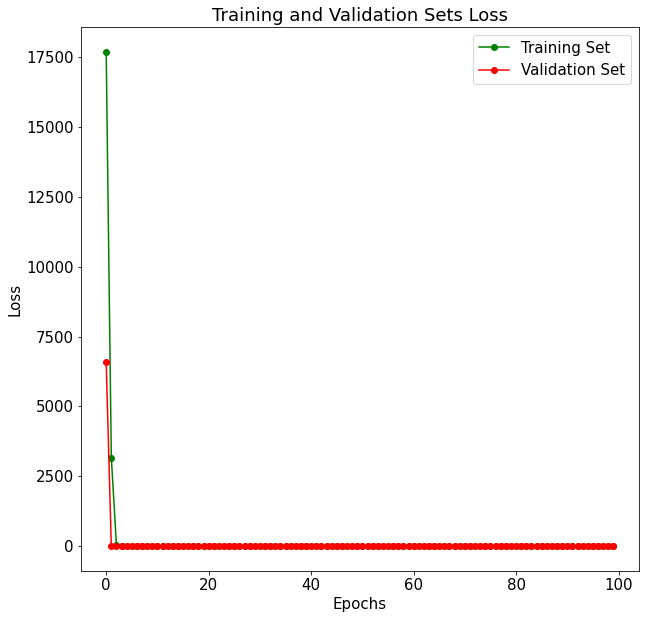

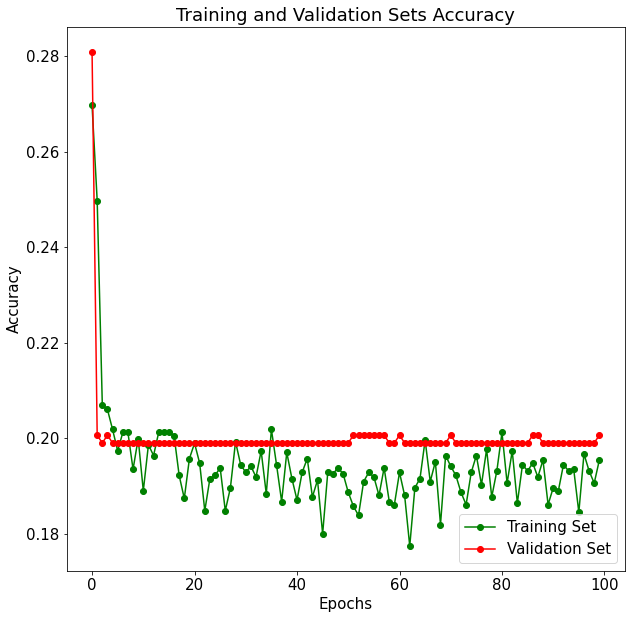

7/7 [==============================] - 0s 12ms/step - loss: 1.6094 - sparse_categorical_accuracy: 0.2030
Best model Test Loss: 1.6094229221343994
Best model Test Accuracy: 0.20304568111896515
Confusion Matrix
Normalized confusion matrix


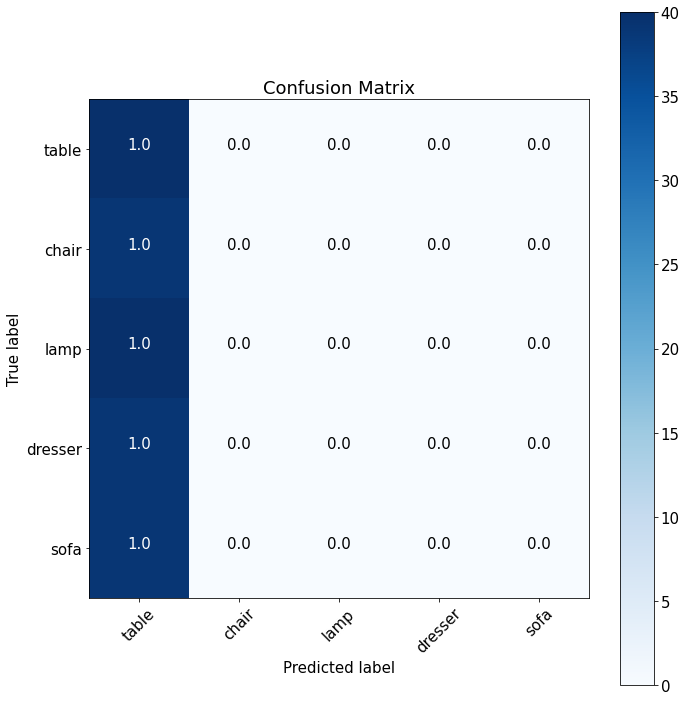

Classification Report
              precision    recall  f1-score   support

       table       0.20      1.00      0.34        40
       chair       0.00      0.00      0.00        39
        lamp       0.00      0.00      0.00        40
     dresser       0.00      0.00      0.00        39
        sofa       0.00      0.00      0.00        39

    accuracy                           0.20       197
   macro avg       0.04      0.20      0.07       197
weighted avg       0.04      0.20      0.07       197


-------- TERMINATED FOLD: 1 --------


/run/media/rr/M2/DevOps/jupyter-lab/python39_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/run/media/rr/M2/DevOps/jupyter-lab/python39_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/run/media/rr/M2/DevOps/jupyter-lab/python39_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [6]:
# experiment model layers
layers = [
    Conv1D(32, kernel_size=1, activation='relu', input_shape=(TARGET_SIZE, 3)),
    Conv1D(64, kernel_size=1, activation='relu'),
    Conv1D(128, kernel_size=1, activation='relu'),
    Conv1D(256, kernel_size=1, activation='relu'),
    Conv1D(512, kernel_size=1, activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
pointclouds_kfold_validation(model_name="Experiment-1", n_splits=6, test_size=0.05,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=32, one_fold=True, resample_data=0, augment=False)

## Experiment 2 - Model

## Experiment 3 - Model

## Experiment 4 - Model